# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable. 
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or 
<a href="http://www.google.com">Google</a><br>

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.


## Downloaded Dataset Requirement



In [3]:
def data_parser():
  import pandas as pd
  import numpy as np

  df = pd.read_excel("Schools.xlsx", sheet_name="Query", engine='openpyxl')
  soccer_data = df[df["Sports"] == "Soccer"]
  soccer_data = soccer_data[["institution_name", "addr1_txt", "city_txt", "state_cd", "ClassificationCode", "classification_name", "EFMaleCount", "EFFemaleCount", "EFTotalCount", "PARTIC_MEN", "PARTIC_WOMEN", "SUM_FTHDCOACH_MALE", "SUM_FTHDCOACH_FEM", "MEN_FTHEADCOACH_MALE", "MEN_FTHEADCOACH_FEM", "WOMEN_FTHDCOACH_MALE", "WOMEN_FTHDCOACH_FEM", "REV_MEN", "REV_WOMEN", "EXP_MEN", "EXP_WOMEN"]]
  for column in ["PARTIC_MEN", "PARTIC_WOMEN", "REV_MEN", "REV_WOMEN", "EXP_MEN", "EXP_WOMEN", "MEN_FTHEADCOACH_MALE", "MEN_FTHEADCOACH_FEM", "WOMEN_FTHDCOACH_MALE", "WOMEN_FTHDCOACH_FEM"]:
      soccer_data[column] = soccer_data[column].fillna(0)
  soccer_data = soccer_data[pd.isna(soccer_data["state_cd"]) == False]
  soccer_data["division"] = soccer_data["classification_name"].str.extract(r"Division (I*)")[0].str.len().fillna(0.0).astype(int)
  soccer_data["profit_men"] = soccer_data["REV_MEN"] - soccer_data["EXP_MEN"]
  soccer_data["profit_women"] = soccer_data["REV_WOMEN"] - soccer_data["EXP_WOMEN"]
  soccer_data.to_csv("collegiate_soccer_data.csv")

  return soccer_data

############ Function Call ############
data_parser()


,institution_name,addr1_txt,city_txt,state_cd,ClassificationCode,classification_name,EFMaleCount,EFFemaleCount,EFTotalCount,PARTIC_MEN,...,MEN_FTHEADCOACH_FEM,WOMEN_FTHDCOACH_MALE,WOMEN_FTHDCOACH_FEM,REV_MEN,REV_WOMEN,EXP_MEN,EXP_WOMEN,division,profit_men,profit_women
4,Alabama A & M University,4900 Meridian Street,Normal,AL,2,NCAA Division I-FCS,1951,3024,4975,0.0,...,0.0,1.0,0.0,0.0,579985.0,0.0,579989.0,1,0.0,-4.0
26,University of Alabama at Birmingham,Administration Bldg Suite 1070,Birmingham,AL,1,NCAA Division I-FBS,4020,6252,10272,33.0,...,0.0,0.0,1.0,856140.0,865816.0,856140.0,865816.0,1,0.0,0.0
64,University of Alabama in Huntsville,301 Sparkman Dr,Huntsville,AL,5,NCAA Division II without football,3915,2818,6733,31.0,...,0.0,1.0,0.0,289306.0,342040.0,289306.0,342040.0,2,0.0,0.0
102,Alabama State University,915 S Jackson Street,Montgomery,AL,2,NCAA Division I-FCS,1258,2188,3446,0.0,...,0.0,1.0,0.0,0.0,435889.0,0.0,435889.0,1,0.0,0.0
140,The University of Alabama,739 University Blvd,Tuscaloosa,AL,1,NCAA Division I-FBS,13112,15902,29014,0.0,...,0.0,1.0,0.0,0.0,816094.0,0.0,1883398.0,1,0.0,-1067304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62012,Husson University,1 College Circle,Bangor,ME,6,NCAA Division III with football,1072,1332,2404,42.0,...,0.0,0.0,0.0,170721.0,60025.0,128510.0,58790.0,3,42211.0,1235.0
62050,University of Saint Katherine,1637 Capalina Road,San Marcos,CA,10,NAIA Division II,122,93,215,25.0,...,0.0,0.0,1.0,407095.0,264665.0,342899.0,203270.0,2,64196.0,61395.0
62088,Clovis Community College,10309 N. Willow Ave,Fresno,CA,17,CCCAA,1100,1264,2364,27.0,...,0.0,0.0,0.0,69050.0,73704.0,63152.0,57969.0,0,5898.0,15735.0
62114,Piedmont International University,420 S. Broad St.,Winston-Salem,NC,15,NCCAA Division I,140,114,254,29.0,...,0.0,1.0,0.0,182587.0,172786.0,182587.0,172786.0,1,0.0,0.0


## Web Collection Requirement \#1


In [4]:
def web_parser1():
  import numpy as np
  import pandas as pd
  import requests as r
  import re
  from pprint import pprint
  import time

  # average age of squads - for games - and win rate?
  # average age of squads and standinds on premier leauge table (final matchday)

  league_list = ["PL", "SA", "BL1", "FL1", "PD"]
  pl_dict_mapper = {"Manchester City FC": "Manchester City", "Liverpool FC": "Liverpool", "Chelsea FC": "Chelsea", "Tottenham Hotspur FC": "Tottenham Hotspur", "Arsenal FC": "Arsenal", "West Ham United FC": "West Ham United", "Manchester United FC": "Manchester United", "Wolverhampton Wanderers FC": "Wolverhampton Wanderers", "Crystal Palace FC": "Crystal Palace", "Leicester City FC" : "Leicester City", "Aston Villa FC": "Aston Villa", "Southampton FC": "Southampton", "Brighton & Hove Albion FC": "Brighton & Hove Albion", "Brentford FC": "Brentford", "Newcastle United FC": "Newcastle United", "Leeds United FC": "Leeds United", "Everton FC": "Everton", "Watford FC": "Watford", "Burnley FC": "Burnley", "Norwich City FC": "Norwich City"}
  sa_dict_mapper = {"AC Milan": "AC Milan", "SSC Napoli": "Napoli", "FC Internazionale Milano": "Inter", "Juventus FC": "Juventus", "AS Roma": "Roma", "SS Lazio": "Lazio", "Atalanta BC": "Atalanta", "ACF Fiorentina": "Fiorentina", "Hellas Verona FC": "Hellas Verona", "US Sassuolo Calcio": "U.S. Sassuolo Calcio", "Torino FC": "Torino F.C.", "Bologna FC 1909": "Bologna", "Udinese Calcio": "Udinese Calcio", "Empoli FC": "Empoli", "Spezia Calcio": "Spezia", "UC Sampdoria": "U.C. Sampdoria", "Cagliari Calcio": "Cagliari", "Venezia FC": "Venezia FC", "Genoa CFC": "Genoa", "US Salernitana 1919": "US Salernitana 1919"}
  bl1_dict_mapper = {"FC Bayern München": "FC Bayern München", "Borussia Dortmund": "Borussia Dortmund", "Bayer 04 Leverkusen": "Bayer 04 Leverkusen", "RB Leipzig": "RB Leipzig", "SC Freiburg": "Sport-Club Freiburg", "TSG 1899 Hoffenheim": "TSG Hoffenheim", "1. FC Union Berlin": "1. FC Union Berlin", "1. FC Köln": "1. FC Köln", "Eintracht Frankfurt": "Eintracht Frankfurt", "1. FSV Mainz 05": "1. FSV Mainz 05", "VfL Bochum 1848": "VfL Bochum 1848", "Borussia Mönchengladbach": "Borussia Mönchengladbach", "VfL Wolfsburg": "VfL Wolfsburg", "FC Augsburg": "FC Augsburg", "VfB Stuttgart": "VfB Stuttgart", "Arminia Bielefeld": "DSC Arminia Bielefeld", "Hertha BSC": "Hertha BSC", "SpVgg Greuther Fürth 1903": "SpVgg Greuther Fürth"}
  fl1_dict_mapper = {"Paris Saint-Germain FC": "Paris Saint-Germain", "Olympique de Marseille": "Olympique de Marseille", "Stade Rennais FC 1901": "Stade Rennais FC", "RC Strasbourg Alsace": "RC Strasbourg Alsace", "OGC Nice": "OGC Nice", "AS Monaco FC": "AS Monaco", "Lille OSC": "LOSC Lille", "FC Nantes": "FC Nantes", "Olympique Lyonnais": "Olympique Lyonnais", "Racing Club de Lens": "Racing Club de Lens", "Montpellier HSC": "Montpellier Hérault SC", "Stade Brestois 29": "Stade Brestois 29", "Stade de Reims": "Stade de Reims", "Angers SCO": "Angers SCO", "ES Troyes AC": "ESTAC Troyes", "FC Lorient": "FC Lorient", "Clermont Foot 63": "Clermont Foot 63", "AS Saint-Étienne": "AS Saint-Étienne", "FC Metz": "FC Metz", "FC Girondins de Bordeaux": "FC Girondins de Bordeaux"}
  pd_dict_mapper = {"Real Madrid CF": "Real Madrid CF", "FC Barcelona": "FC Barcelona", "Club Atlético de Madrid": "Atlético de Madrid", "Sevilla FC": "Sevilla FC", "Real Betis Balompié": "Real Betis Balompié", "Real Sociedad de Fútbol": "Real Sociedad", "Villarreal CF": "Villarreal CF", "Athletic Club": "Athletic Club de Bilbao", "Valencia CF": "Valencia CF", "CA Osasuna": "CA Osasuna", "RC Celta de Vigo": "RC Celta de Vigo", "RCD Espanyol de Barcelona": "RCD Espanyol de Barcelona", "Rayo Vallecano de Madrid": "Rayo Vallecano", "Getafe CF": "Getafe CF", "Elche CF": "Elche CF", "Granada CF": "Granada CF", "Cádiz CF": "Cádiz CF", "RCD Mallorca": "RCD Mallorca", "Levante UD": "Levante Unión Deportiva", "Deportivo Alavés": "Deportivo Alavés"}

  for league in league_list:
      league_count = 0 # check if needed

      base_url_standings = f"https://api.football-data.org/v2/competitions/{league}/standings"
      key = "6ffd78a1099648b9a68901335d4fc843"

      response_standings = r.get(base_url_standings, headers={"X-Auth-Token":key})
      data_standings = response_standings.json()
      # pprint(data_standings["standings"][0]["table"])

      newList = []

      for i in data_standings["standings"][0]["table"]:
          newDict = {}

          newDict["id"] = i["team"]["id"]

          if league == "PL":
              newDict["team"] = pl_dict_mapper[i["team"]["name"]]
          elif league == "SA":
              newDict["team"] = sa_dict_mapper[i["team"]["name"]]
          elif league == "BL1":
              newDict["team"] = bl1_dict_mapper[i["team"]["name"]]
          elif league == "FL1":
              newDict["team"] = fl1_dict_mapper[i["team"]["name"]]
          elif league == "PD":
              newDict["team"] = pd_dict_mapper[i["team"]["name"]]

          newDict["position"] = i["position"]
          newDict["points"] = i["points"]
          newDict["playedGames"] = i["playedGames"]
          newDict["won"] = i["won"]
          newDict["lost"] = i["lost"]
          newDict["draw"] = i["draw"]
          newDict["goalsFor"] = i["goalsFor"]
          newDict["goalsAgainst"] = i["goalsAgainst"]
          newDict["goalDifference"] = i["goalDifference"]
          newDict["form"] = i["form"]

          newList.append(newDict)

      # pprint(newList)

      league_name = f"df_{league}_2021_2022"

      league_name = pd.DataFrame(newList) # creates DataFrame with newList data
      # print(league_name)

      league_name.loc[:, "form"] = np.where((league_name.loc[:, "won"]/league_name.loc[:, "lost"]) >= 1, "Good", "Bad")
      # print(league_name)

      league_name.to_csv(f"{league}_2022.csv") # keep un-commented

      time.sleep(20) # check if needed

  bl1_data = pd.read_csv("BL1_2022.csv", index_col=0)
  bl1_data["league"] = "BL1"
  fl1_data = pd.read_csv("FL1_2022.csv", index_col=0)
  fl1_data["league"] = "FL1"
  pd_data = pd.read_csv("PD_2022.csv", index_col=0)
  pd_data["league"] = "PD"
  pl_data = pd.read_csv("PL_2022.csv", index_col=0)
  pl_data["league"] = "PL"
  sa_data = pd.read_csv("SA_2022.csv", index_col=0)
  sa_data["league"] = "SA"
  league_data = pd.concat([bl1_data, fl1_data, pd_data, pl_data, sa_data]).reset_index().drop("index", axis = 1)
  league_data.to_csv("league_data.csv")
  
  return league_data
############ Function Call ############
web_parser1()

,id,team,position,points,playedGames,won,lost,draw,goalsFor,goalsAgainst,goalDifference,form,league
0,5,FC Bayern München,1,75,31,24,4,3,92,30,62,Good,BL1
1,4,Borussia Dortmund,2,63,31,20,8,3,77,46,31,Good,BL1
2,3,Bayer 04 Leverkusen,3,55,31,16,8,7,72,44,28,Good,BL1
3,721,RB Leipzig,4,54,31,16,9,6,66,33,33,Good,BL1
4,17,Sport-Club Freiburg,5,52,31,14,7,10,52,37,15,Good,BL1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,584,U.C. Sampdoria,16,30,34,8,20,6,41,57,-16,Bad,SA
94,104,Cagliari,17,28,34,6,18,10,31,62,-31,Bad,SA
95,455,US Salernitana 1919,18,25,33,6,20,7,28,70,-42,Bad,SA
96,107,Genoa,19,25,34,3,15,16,25,54,-29,Bad,SA


## Web Collection Requirement #2

In [5]:
def web_parser2():
  import re
  import requests
  from pprint import pprint
  from bs4 import BeautifulSoup
  import csv
  import numpy as np
  import pandas as pd

  base_url = "https://sofifa.com/players?showCol%5B0%5D=ae&showCol%5B1%5D=hi&showCol%5B2%5D=wi&showCol%5B3%5D=oa&showCol%5B4%5D=pt&showCol%5B5%5D=vl&showCol%5B6%5D=wg&showCol%5B7%5D=tt&showCol%5B8%5D=pf&showCol%5B9%5D=ta&showCol%5B10%5D=ts&showCol%5B11%5D=to&showCol%5B12%5D=tp&showCol%5B13%5D=te&showCol%5B14%5D=td&showCol%5B15%5D=tg&r=220039&set=true&offset="
  # base_url to webpage from March 15, 2022. Scraped data is accurate as of this date.

  def convert_currency(astr): # function to convert currency to float
      digits = float(re.search(r"[0-9.]+", astr).group())
      return digits * 1E3 if "K" in astr else digits * 1E6 if "M" in astr else digits

  data = []

  for i in range(0, 19981, 60): # 19981
      offset = i
      response = requests.get(base_url+str(offset))
      page = BeautifulSoup(response.text, "html.parser")
      table = page.find("table", {"class":"table table-hover persist-area"})
      header = table.find("thead")
      header_items = header.find_all("th")[1:] # remove the first item because it is just a blank space
      rows = table.find("tbody").find_all("tr")
      # column order:
      #   0      1   2      3       4           5         6      7      8    9    10      11      12    13      14      15        16       17         18 
      # avatar name age overall potential team/contract height weight foot value wage attacking skill movement power mentality defending goalkeeping total
      # Now get player values:
      for row in rows:
          row_data = {}
          items = row.find_all("td")
          name_text = items[1].find_all("a")
          team = items[5].find("a").text
          if len(team) == 0: # skip all players with no team - these are free agents that will casue many inconsistencies
              continue
          row_data["team"] = team
          row_data["name"] = re.search(r"[A-z\u00C0-\u017F. ]+", name_text[0].text).group() # Some name values have weird numbers in front of them so I used RegEx to only get the name out. Also got accented char unicode range. 
          row_data["nationality"] = items[1].find("img").get("title")
          row_data["positions"] = " ".join(pos.text for pos in name_text[1:])
          row_data["age"] = items[2].text
          row_data["overall"] = items[3].text
          row_data["potential"] = items[4].text
          row_data["contract"] = items[5].find("div", {"class":"sub"}).text.strip()
          row_data["contract_start"] = int(re.search(r"([0-9]{4}) ~", row_data["contract"]).group(1) if "~" in row_data["contract"] else "0")
          row_data["contract_end"] = int(re.search(r"~ ([0-9]{4})", row_data["contract"]).group(1) if "~" in row_data["contract"] else "0")
          row_data["contract_length"] = row_data["contract_end"] - row_data["contract_start"]
          remaining_categories = ["height", "weight", "foot", "value", "wage", "attacking", "skill", "movement", "power", "mentality", "defending", "goalkeeping", "total"]
          row_data.update(dict(zip(remaining_categories, [item.text for item in items[6:]])))
          row_data["value"] = convert_currency(row_data["value"])
          row_data["wage"] = convert_currency(row_data["wage"])
          row_data["weight"] = re.search(r"\d+", row_data["weight"]).group()
          row_data["height"] = re.search(r"\d+", row_data["height"]).group()
          if row_data not in data:
              data.append(row_data)

  df = pd.DataFrame(data=data, columns=["name", "nationality", "team", "positions", "age", "overall", "potential", "contract", "contract_start", "contract_end", "contract_length", "height", "weight", "foot", "value", "wage", "attacking", "skill", "movement", "power", "mentality", "defending", "goalkeeping", "total"])

  df = df[(df["contract_end"] >= 2022) | (df["contract_end"] == 0)]
  df["nationality"] = df["nationality"].replace("England", "United Kingdom of Great Britain and Northern Ireland")
  df["nationality"] = df["nationality"].replace("Northern Ireland", "United Kingdom of Great Britain and Northern Ireland")
  df.to_csv("player_data.csv", index = True)
  return df

############ Function Call ############
web_parser2()

,name,nationality,team,positions,age,overall,potential,contract,contract_start,contract_end,...,value,wage,attacking,skill,movement,power,mentality,defending,goalkeeping,total
0,L. Messi,Argentina,Paris Saint-Germain,RW ST CF,34,93,93,2021 ~ 2023,2021,2023,...,78000000.0,320000.0,429,470,451,389,347,79,54,2219
1,R. Lewandowski,Poland,FC Bayern München,ST,32,92,92,2014 ~ 2023,2014,2023,...,119500000.0,270000.0,430,407,407,424,396,96,51,2211
2,K. Mbappé,France,Paris Saint-Germain,ST LW,22,91,95,2018 ~ 2022,2018,2022,...,194000000.0,230000.0,411,404,462,411,353,92,42,2175
3,M. Salah,Egypt,Liverpool,RW,29,91,91,2017 ~ 2023,2017,2023,...,129000000.0,350000.0,402,412,457,399,382,122,62,2236
4,K. De Bruyne,Belgium,Manchester City,CM CAM,30,91,91,2015 ~ 2025,2015,2025,...,125500000.0,350000.0,406,439,400,408,406,186,56,2301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18869,L. Rudden,Republic of Ireland,Finn Harps,ST,19,47,60,2021 ~ 2022,2021,2022,...,110000.0,500.0,190,190,329,229,184,35,53,1210
18870,R. Gallagher,Republic of Ireland,Finn Harps,CAM,20,47,61,2018 ~ 2022,2018,2022,...,110000.0,500.0,195,193,290,221,207,97,52,1255
18871,G. Singh,India,Mumbai City FC,ST LM,17,47,62,2021 ~ 2024,2021,2024,...,110000.0,500.0,195,196,340,251,222,135,50,1389
18872,R. Rana,India,ATK Mohun Bagan FC,CAM CM,18,47,62,2021 ~ 2026,2021,2026,...,110000.0,500.0,190,214,321,241,226,114,47,1353


## Web Collection Additional Source:

In [6]:
def web_parser3():
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import re
  from bs4 import BeautifulSoup
  import requests
  import plotly.express as px
  import seaborn as sns
  
  url = "https://statisticstimes.com/geography/countries-by-continents.php"
  html = requests.get(url).text
  soup = BeautifulSoup(html, "html.parser")
  table = soup.find("table", {"style":"width:945px;display:table;border:1px solid #0000FF;"})
  header = [th.text for th in table.find_all("th")]
  tbody = table.find("tbody")
  content = [[td.text for td in tr.find_all("td")] for tr in tbody.find_all("tr")]
  countries = pd.DataFrame(data = content, columns=header).drop("No", axis = 1)
  countries["Region 2"] = countries["Region 2"].replace(r"", "None")
  # Change country names manually to match webscraped dataset
  countries["Country or Area"] = countries["Country or Area"].replace("United States of America", "United States")
  countries["Country or Area"] = countries["Country or Area"].replace("Russian Federation", "Russia")
  countries["Country or Area"] = countries["Country or Area"].replace("Venezuela (Bolivarian Republic of)", "Venezuela")
  countries["Country or Area"] = countries["Country or Area"].replace("Bolivia (Plurinational State of)", "Bolivia")
  countries["Country or Area"] = countries["Country or Area"].replace("Côte d’Ivoire", "Côte d'Ivoire")
  countries["Country or Area"] = countries["Country or Area"].replace("Democratic Republic of the Congo", "Congo DR")
  countries["Country or Area"] = countries["Country or Area"].replace("United Republic of Tanzania", "Tanzania")
  countries["Country or Area"] = countries["Country or Area"].replace("China", "China PR")
  countries["Country or Area"] = countries["Country or Area"].replace("Iran (Islamic Republic of)", "Iran")
  countries["Country or Area"] = countries["Country or Area"].replace("Republic of Korea", "Korea Republic")
  countries["Country or Area"] = countries["Country or Area"].replace("Guinea-Bissau", "Guinea Bissau")
  countries["Country or Area"] = countries["Country or Area"].replace("Ireland", "Republic of Ireland")
  countries["Country or Area"] = countries["Country or Area"].replace("Viet Nam", "Vietnam")
  countries.to_csv("countries.csv")
  return countries

############ Function Call ############
web_parser3()

,Country or Area,ISO-alpha3 Code,M49 Code,Region 1,Region 2,Continent
0,Afghanistan,AFG,004,Southern Asia,None,Asia
1,Åland Islands,ALA,248,Northern Europe,None,Europe
2,Albania,ALB,008,Southern Europe,None,Europe
3,Algeria,DZA,012,Northern Africa,None,Africa
4,American Samoa,ASM,016,Polynesia,None,Oceania
...,...,...,...,...,...,...
244,Wallis and Futuna Islands,WLF,876,Polynesia,None,Oceania
245,Western Sahara,ESH,732,Northern Africa,None,Africa
246,Yemen,YEM,887,Western Asia,None,Asia
247,Zambia,ZMB,894,Eastern Africa,Sub-Saharan Africa,Africa


#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1. 

2. 

3. 

4. (if applicable)

5. (if applicable)


## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

*   Downloaded Dataset Source: https://ope.ed.gov/athletics/#/datafile/list
*   Web Collection #1 Source: <a> https://sofifa.com/players </a>
*   Web Collection #2 Source: https://www.football-data.org/documentation/quickstart 
*   Additional web source: https://statisticstimes.com/geography/countries-by-continents.php <- THIS IS NEW!!



# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations
*   Export aggregated data to at least 1 summary file 

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function. 

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit. 

# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

## Insights

In [7]:
def insight1():
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import re
  from bs4 import BeautifulSoup
  import requests
  import plotly.express as px
  import seaborn as sns
  player_data = pd.read_csv("player_data.csv", index_col=0).reset_index().drop("index", axis = 1)
  league_data = pd.read_csv("league_data.csv", index_col=0)
  # first create a data that returns tuple of the slope, intercept, pearson's correlation coefficient of two series
  def linear_data(x, y):
    """Returns tuple of slope, intercept, pearson's correlation coefficient"""
    theta = np.polyfit(x, y, 1)
    correlation = np.corrcoef(x, y)[0,1]
    return theta[0], theta[1], correlation
  # Next, a Function to return correlation data per league (df). 
  # Returns slope, intercept, correlation between any two given variables PER LEAGUE. 
  # Variable names as strings, they are column headers from league_data and player_data, and aggregate function to apply to Y variable
  
  def league_correlation_data(X, Y, X_agg, Y_agg):
    df = player_data.merge(league_data, on="team").groupby(["league", "team"]).aggregate(x_agg = (X, X_agg), y_agg = (Y, Y_agg))
    slope = df.groupby("league").apply(lambda d:linear_data(x = d["x_agg"], y = d["y_agg"])[0])
    intercept = df.groupby("league").apply(lambda d:linear_data(x = d["x_agg"], y = d["y_agg"])[1])
    correlation = df.groupby("league").apply(lambda d:linear_data(x = d["x_agg"], y = d["y_agg"])[2])
    linear_stats = pd.DataFrame({"slope":slope, "intercept":intercept, "correlation":correlation})
    linear_stats["x_name"], linear_stats["x_agg"], linear_stats["y_name"], linear_stats["y_agg"] = X, X_agg, Y, Y_agg
    linear_stats.reset_index(inplace = True)
    return linear_stats

  # next, go through each possible combination of correlations for each league:

  columns = ['overall', 'contract_length', 'height', 'weight', 'value', 'attacking', 'skill', 'mentality', 'defending', 'position']
  correlation_data = pd.DataFrame(columns=["league", "slope", "intercept", "correlation", "x_name", "x_agg", "y_name", "y_agg"])
  for x in columns:
      for y in columns:
          correlation_data = pd.concat([correlation_data, league_correlation_data(X = x, Y = y, X_agg="mean", Y_agg="mean")], axis = 0)
  
  # Next, create pivot table from this data, where the x-axis is the league and the y-axis are the relevant correlations of data with position on the table
  p = correlation_data[(correlation_data["x_name"] == "position") & (correlation_data["y_name"] != "position")].pivot(index = "league", columns = "y_name", values = "correlation")
  # this pivot dataframe will be used to create a heatmap visualization later on
  # Also sorted so leagues with higher total correlations are at the bottom:
  p["abs_sum_1"] = p.abs().sum(axis=1)
  p["abs_sum_1"] = p.abs().sum(axis=1)
  p.sort_values(by="abs_sum_1", ascending=True, inplace=True, axis=0)
  p.loc["abs_sum_0",:] = p.abs().sum(axis=0)
  p.sort_values(by="abs_sum_0", ascending=True, inplace=True, axis=1)
  p.drop("abs_sum_1", axis=1, inplace=True)
  p.drop("abs_sum_0", axis=0, inplace=True)
  return p, p.abs().mean(axis=0).sort_values(ascending=False)

############ Function Call ############
insight1()


(y_name    weight    height  defending  contract_length  mentality  attacking  \
 league                                                                         
 PL      0.007372  0.228612  -0.382502        -0.629087  -0.429102  -0.384688   
 FL1     0.193891  0.135809  -0.541708        -0.578257  -0.683460  -0.696635   
 PD     -0.118659  0.246298  -0.318036        -0.688344  -0.633858  -0.666024   
 BL1    -0.156128 -0.229715  -0.527214        -0.563757  -0.732366  -0.716030   
 SA      0.151456  0.151667  -0.762706        -0.701347  -0.885290  -0.907058   
 
 y_name     skill   overall     value  
 league                                
 PL     -0.633294 -0.572029 -0.810210  
 FL1    -0.720087 -0.746470 -0.651846  
 PD     -0.707332 -0.805791 -0.831981  
 BL1    -0.660997 -0.800010 -0.727880  
 SA     -0.864322 -0.882879 -0.867824  ,
 y_name
 value              0.777948
 overall            0.761436
 skill              0.717207
 attacking          0.674087
 mentality          0.6728

### Insight 1 Explanation

**What average characteristics do successful teams share?** <br>
To answer this question, "success" is defined as standing on the team's respective league table according to the data collected from the API. I then compared success to the following characteristics, each of which may be telling of a team's performance:

* average attacking rating per team
* average defending rating per team
* average player height per team
* average player weight per team
* average mentality rating per team
* average overall rating per team
* average skill rating per team
* average value per team

Finding out how each of these variables correlates to position on table can tells us what attributes successful teams share, as well as what characteristics different leagues in Europe value. This insight returns a pivot dataframe where each value is the correlation between different sets of variables. The pivot table was also sorted by the sum of absolute values of correlation, meaning that the teams with higher correlated variables to the position on table are at the bottom. Similarly, the columns of the dataframe are also sorted in ascending order from left to right of the sum of absolute value of the column sums. <br>
This insight also returns a Series of the averages of absolute values of each correlation per variable, to see overall what variable is most strongly correlated to position on table across all of the top five leagues. This Series is sorted in ascending order, revealing that value is most strongly correlated to success. This is expected, because a successful team tends to attract more skilled and well known players. It is rare to have an underdog story, but by looking at these grand averages single outliers are missed. It is interesting to see that height and weight have extremely low average correlations, which shows that soccer is not a sport based on physicality, rather skill (FIFA 22's skill rating ranked highly as a correlation with 0.72). In fact, some of the sports greatest players such as Lionel Messi (5'7"), Diego Maradona (5'5"), and Pelé (5'8") were on the shorter side!

In [8]:
def insight2():
  import numpy as np
  import pandas as pd

  web_scrape = pd.read_csv("player_data.csv", index_col=0).reset_index().drop("index", axis = 1)
  api = pd.read_csv("league_data.csv", index_col=0)
  final_api = api.loc[:, ["team", "position", "points", "won", "goalsFor", "form"]]
  final_api.loc[:, "form"] = np.where(final_api.loc[:, "form"] == "Good", 1, 0) # rating changes to binary

  # return final_api

  final_wc = web_scrape.groupby("team").agg({"age": "mean", "overall": "mean", "value": "mean"})

  # print(final_api)
  # print(final_wc)

  df = final_api.merge(final_wc, how="outer", on="team")
  updated_df = df.dropna(axis=0)
  # return updated_df

  bl1_df = updated_df.iloc[0:18] # bundesliga
  fl1_df = updated_df.iloc[18:38] # ligue 1
  pd_df = updated_df.iloc[38:58] # spain
  pl_df = updated_df.iloc[58:78] # premier league
  sa_df = updated_df.iloc[78:98] # serie a

  return bl1_df, fl1_df, pd_df, pl_df, sa_df

  # print(bl1_df)
  # print(fl1_df)
  # print(pd_df)
  # print(pl_df)
  # print(sa_df)

############ Function Call ############
insight2()

(                        team  position  points   won  goalsFor  form  \
 0          FC Bayern München       1.0    75.0  24.0      92.0   1.0   
 1          Borussia Dortmund       2.0    63.0  20.0      77.0   1.0   
 2        Bayer 04 Leverkusen       3.0    55.0  16.0      72.0   1.0   
 3                 RB Leipzig       4.0    54.0  16.0      66.0   1.0   
 4        Sport-Club Freiburg       5.0    52.0  14.0      52.0   1.0   
 5         1. FC Union Berlin       6.0    50.0  14.0      42.0   1.0   
 6                 1. FC Köln       7.0    49.0  13.0      47.0   1.0   
 7             TSG Hoffenheim       8.0    46.0  13.0      52.0   1.0   
 8        Eintracht Frankfurt       9.0    40.0  10.0      42.0   0.0   
 9            1. FSV Mainz 05      10.0    39.0  11.0      43.0   0.0   
 10  Borussia Mönchengladbach      11.0    38.0  10.0      45.0   0.0   
 11             VfL Wolfsburg      12.0    37.0  11.0      39.0   0.0   
 12           VfL Bochum 1848      13.0    36.0  10

### Insight 2 Explanation

The API data and FIFA Web Scrape data were joined based on team, and average age, club worth, and player rating were all kept along with position on table for each club. The above dataframes are the ones returned for specific teams in each league. These characteristics can be evaluated and considered when asking why a team is a specific position on the table? An Andrews Curve will be used to see balance between these characteristics and a team's position on the table.

In [9]:
def insight3():
  import pandas as pd
  player_data = pd.read_csv("player_data.csv", index_col=0).reset_index().drop("index", axis = 1)
  # Separate all positions listed in the string in "positions" column into separate columsn for each player
  positions_data = player_data[["name", "nationality", "wage", "value", "overall", "positions"]].set_index(["name", "nationality", "wage", "value", "overall"]).apply(lambda x:x.str.split(" ").explode()).reset_index()
  # get mean for the wage, value, overall columns for each position that exists per nationality. Nationality sorted in ascending order,
  # then sorted withing group in descending order by average wage. also gives count of each position per country.
  pos_country_data = positions_data.groupby(["nationality", "positions"]).aggregate(mean_wage = ("wage", "mean"), mean_value = ("value", "mean"), mean_overall = ("overall", "mean"), count = ("overall", "count")).sort_values(by=["nationality", "mean_wage"], ascending=[True, False]) # all positions
  # get top 10 positions with highest mean wage per country
  top_pos_per_country = positions_data.groupby(["nationality", "positions"]).aggregate(mean_wage = ("wage", "mean"), mean_value = ("value", "mean"), mean_overall = ("overall", "mean"), count = ("overall", "count")).nlargest(10, columns = ["count", "mean_wage"])
  # mean value, wage, overall for all positions, not by nationality, sorted by mean wage in descending order
  top_pos = positions_data.groupby("positions").aggregate(mean_wage = ("wage", "mean"), mean_value = ("value", "mean"), mean_overall = ("overall", "mean"), count = ("overall", "count")).sort_values(by = "mean_wage", ascending=False)

  return pos_country_data, top_pos_per_country, top_pos



############ Function Call ############
insight3()


(                          mean_wage    mean_value  mean_overall  count
 nationality positions                                                 
 Afghanistan RM          2000.000000  8.750000e+05     64.000000      1
 Albania     GK         35000.000000  9.500000e+06     76.000000      2
             RB         25666.666667  3.933333e+06     72.666667      3
             ST         19750.000000  3.412500e+06     67.500000      8
             CF         17000.000000  4.450000e+06     69.500000      2
 ...                             ...           ...           ...    ...
 Zimbabwe    CB          8000.000000  2.041667e+06     68.000000      3
             LB          5500.000000  1.750000e+06     67.500000      2
             RB          2000.000000  9.000000e+05     67.000000      1
             CF           950.000000  3.000000e+06     73.000000      1
             LW           500.000000  1.200000e+06     67.000000      1
 
 [1572 rows x 4 columns],
                                    

### Insight 3 Explanation

**What is the highest paid position?** <br>
This insight returns three dataframes in the form of a tuple. The first dataframe is an aggregated dataframe that finds each player position in each country and finds the mean wage, mean value, and mean overall rating, as well as a count to how many of each position there are per country. The second dataframe shows the top 10 positions by count and then mean wage - it shows the 10 most frequent positions by country, and then takes the top positions by average wage. This reveals that the CM, CB, ST from the United Kingdom are the highest paid positions, followed by the CB from Germany, and CM from spain. 

In [10]:
def insight4():
  import pandas as pd
  player_data = pd.read_csv("player_data.csv", index_col=0).reset_index().drop("index", axis = 1)
  countries = pd.read_csv("countries.csv", index_col=0)
  df = player_data.merge(countries, left_on="nationality", 
                         right_on="Country or Area")[["nationality", 
                                                      "overall", "value", 
                                                      "wage", "ISO-alpha3 Code", 
                                                      "Continent"]].groupby(["Continent", 
                                                                             "nationality", 
                                                                             "ISO-alpha3 Code"]).describe().reset_index()
  df = df[df["Continent"] == "Europe"]
  return df.sort_values(by = ("overall", "mean"), ascending=False)

############ Function Call ############
insight4()

Continent                                        nationality  \
                                                                   
108    Europe                                            Ukraine   
88     Europe                                              Italy   
98     Europe                                           Portugal   
105    Europe                                              Spain   
76     Europe                             Bosnia and Herzegovina   
102    Europe                                             Serbia   
78     Europe                                            Croatia   
104    Europe                                           Slovenia   
103    Europe                                           Slovakia   
93     Europe                                         Montenegro   
85     Europe                                             Greece   
101    Europe                                             Russia   
92     Europe                                              Malta   
83     Europe                                             France   
72     Europe                                            Albania   
86     Europe                                            Hungary   
94     Europe                                        Netherlands   
75     Europe                                            Belgium   
95     Europe                                    North Macedonia   
73     Europe                                            Austria   
84     Europe                                            Germany   
91     Europe                                         Luxembourg   
107    Europe                                        Switzerland   
79     Europe                                            Denmark   
87     Europe                                            Iceland   
82     Europe                                            Finland   
81     Europe                                      Faroe Islands   
109    Europe  United Kingdom of Great Britain and Northern I...   
77     Europe                                           Bulgaria   
97     Europe                                             Poland   
106    Europe                                             Sweden   
96     Europe                                             Norway   
100    Europe                                            Romania   
90     Europe                                          Lithuania   
89     Europe                                             Latvia   
80     Europe                                            Estonia   
74     Europe                                            Belarus   
99     Europe                                Republic of Ireland   

    ISO-alpha3 Code overall                                                 \
                      count       mean       std   min    25%   50%    75%   
108             UKR    64.0  70.312500  5.359682  54.0  66.75  71.5  74.00   
88              ITA   327.0  70.027523  7.072966  50.0  65.00  70.0  75.00   
98              PRT   368.0  69.798913  6.309268  52.0  65.00  69.0  74.00   
105             ESP  1086.0  69.439227  6.145208  50.0  65.00  69.0  74.00   
76              BIH    63.0  69.396825  4.887574  58.0  66.00  69.0  72.00   
102             SRB   118.0  69.305085  6.048958  53.0  65.00  69.0  73.00   
78              HRV   154.0  69.240260  5.968386  51.0  65.00  69.0  73.00   
104             SVN    48.0  69.166667  6.278411  57.0  65.75  68.0  73.00   
103             SVK    60.0  69.116667  5.596887  58.0  64.75  68.5  73.00   
93              MNE    23.0  69.086957  5.575213  61.0  65.00  67.0  72.00   
85              GRC    90.0  69.033333  4.904595  58.0  66.00  69.0  72.00   
101             RUS    79.0  68.101266  6.307494  55.0  63.00  68.0  72.50   
92              MLT     2.0  68.000000  5.656854  64.0  66.00  68.0  70.00   
83              FRA   961.0  67.533819  6.880767  50.0  63.00  67.0  72.00   
72              ALB    47.0  67.510

### Insight 4 Explanation

This insight is very straight forward, but the more interesting results are seen in the visualization for this dataframe. This dataframe returns a description of the average for overall, value and wage for all the players per nationality, sorted in descending order of mean wage and then value. The dataframe was then filtered using masking so that only European countries would be revealed, since these are the most revelant, considering that the rest of the insights so far have dealt with the top five European leagues. Not filtering for European countries reveals that Egypt has players with the highest average wage that are logged in the database. However, it is important to note that they only have 14 total players in the database, which means that the average is increased drastically. For this reason, the visualization is limited to only European countries. The database has majority European players so this filtering is justified.

In [11]:
def insight5():
  import pandas as pd
  import numpy as np

  player_data = pd.read_csv("collegiate_soccer_data.csv", index_col=0).reset_index().drop("index", axis = 1)

  updated_df = player_data.groupby("state_cd").mean()

  updated_df["net_profit"] = updated_df["profit_men"] + updated_df["profit_women"]

  final_df = updated_df.drop(["EFTotalCount", "ClassificationCode", "PARTIC_MEN", "PARTIC_WOMEN", "SUM_FTHDCOACH_MALE", "SUM_FTHDCOACH_FEM", 'MEN_FTHEADCOACH_MALE', 'MEN_FTHEADCOACH_FEM',
       'WOMEN_FTHDCOACH_MALE', 'WOMEN_FTHDCOACH_FEM', "division"], axis=1)

  final_df["marginal_revenue"] = (final_df["REV_MEN"] - final_df["REV_WOMEN"]) / (final_df["EFMaleCount"] - final_df["EFFemaleCount"])

  final_df["marginal_revenue"] = np.where(final_df["marginal_revenue"] <= 0, final_df["marginal_revenue"] * -1, final_df["marginal_revenue"])

  final_df["avg_revenue_men"] = final_df["REV_MEN"] / final_df["EFMaleCount"]

  final_df["avg_revenue_women"] = final_df["REV_WOMEN"] / final_df["EFFemaleCount"]

  final_df = final_df.drop(["EFMaleCount", "EFFemaleCount", "REV_MEN", "REV_WOMEN", "EXP_MEN", "EXP_WOMEN"], axis=1)

  final_df = final_df.sort_values(by=["net_profit", "marginal_revenue"], ascending=False)
  
  return final_df

############ Function Call ############
insight5()

,profit_men,profit_women,net_profit,marginal_revenue,avg_revenue_men,avg_revenue_women
state_cd,,,,,,
WV,85274.500000,50113.500000,135388.000000,28.553980,354.529955,314.717211
DE,8050.200000,4802.200000,12852.400000,120.835129,134.893112,130.735483
DC,26833.250000,-16553.250000,10280.000000,34.090407,343.352203,193.010911
MO,5615.137255,2273.254902,7888.392157,103.719337,201.097153,180.663453
RI,1278.444444,3643.888889,4922.333333,52.452447,180.151971,156.424880
NV,2068.800000,1562.600000,3631.400000,211.340000,50.739544,82.100816
MA,1983.126984,1543.555556,3526.682540,122.879562,118.946673,119.325383
SD,2461.615385,-455.538462,2006.076923,1641.803644,75.938116,255.288353
ME,3172.888889,-1382.833333,1790.055556,240.955938,112.897106,129.849731


### Insight 5 Explanation

The above datafame on collegiate soccer had financial math done on it to determine the state with the highest net profit, for both men and women. Columns that were not relevant, in regard to finance were dropped. 

## Data Visualizations

<AxesSubplot:title={'center':'Correlation between position on table and other average \nvariables across the top five European leagues'}, xlabel='mean variable', ylabel='league'>

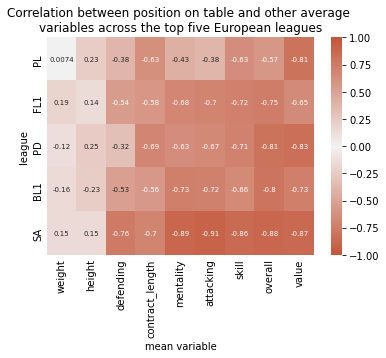

In [12]:
def visual1():
  import seaborn as sns
  ax = sns.heatmap(insight1()[0], annot=True, center = 0, cmap = sns.diverging_palette(20,20, as_cmap=True), vmax=1, vmin=-1, annot_kws={"size": 7})
  ax.tick_params(axis='both', which='both', length=0)
  ax.set(title = "Correlation between position on table and other average \nvariables across the top five European leagues", xlabel="mean variable")
  return ax

############ Function Call ############
visual1()

### Visualization 1 Explanation

This visualization turns the pivot DataFrame from insight 1 and turns it into a heatmap to better visualize the insight. The colors are centered at 0.0 meaning low correlation at light colors, and high correlations (±1.0) at dark colors. As said before, height and weight have very low correlation. The strongest correlation is found with the attacking rating in the italian league (SA), which shows that successful Italian clubs value attacking players! 

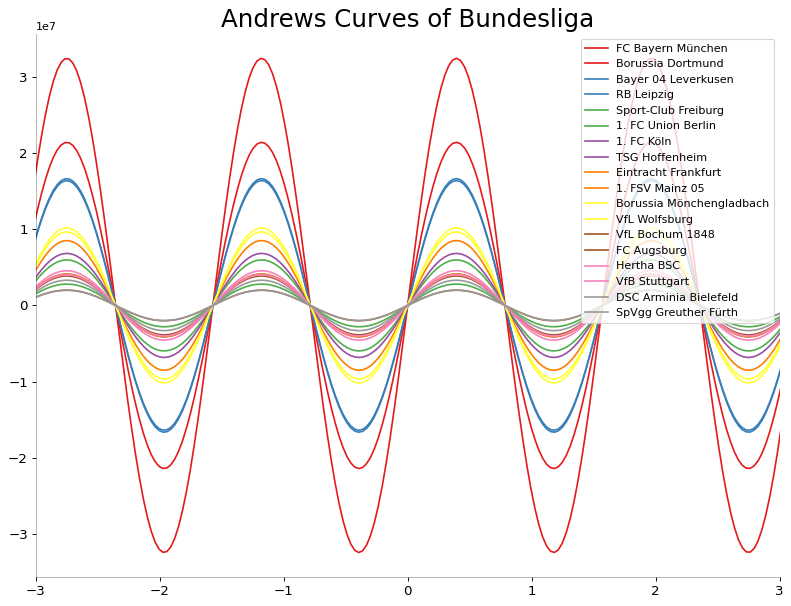

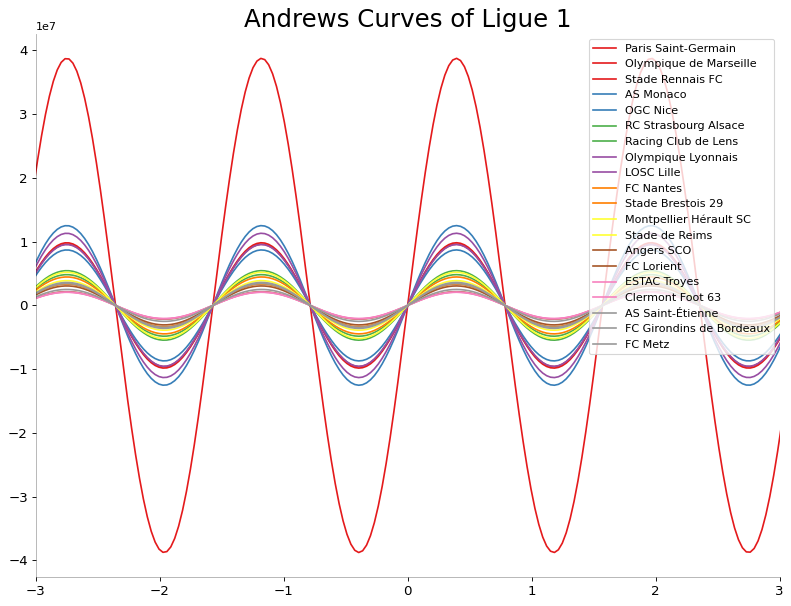

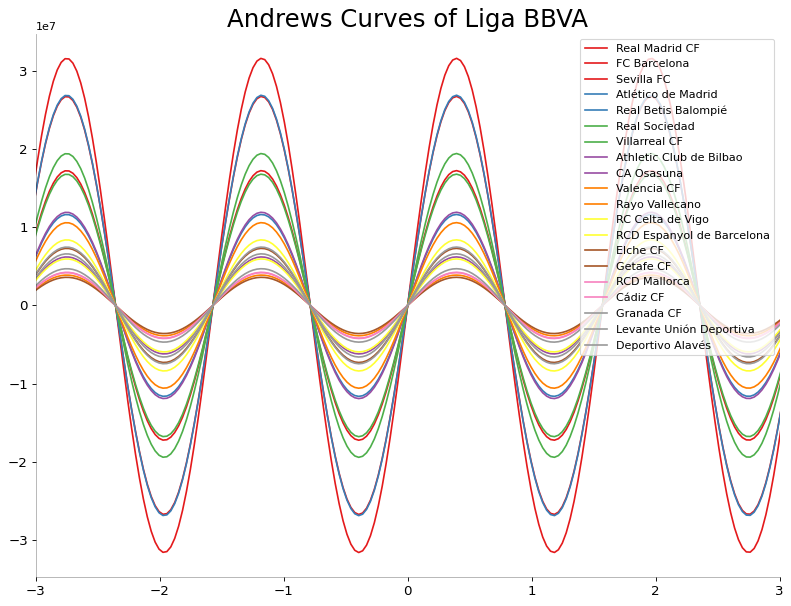

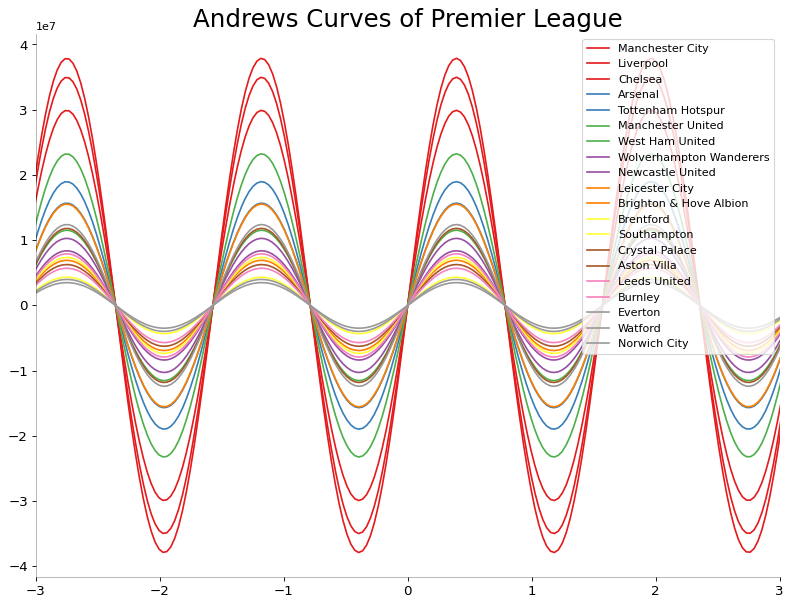

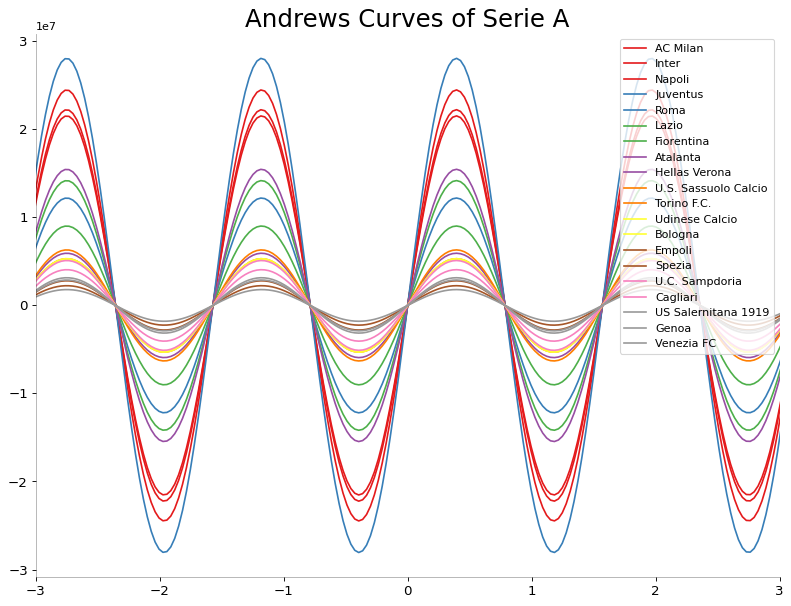

In [13]:
def visual2():
  import matplotlib.pyplot as plt
  from pandas.plotting import andrews_curves

  # Data
  bl1_df, fl1_df, pd_df, pl_df, sa_df = insight2()
  final_list = [bl1_df, fl1_df, pd_df, pl_df, sa_df]

  ## Test Plot (Andrew Curve)

  for i in range(len(final_list)):
    # Plot
    plt.figure(figsize=(12,9), dpi= 80)
    andrews_curves(final_list[i], 'team', colormap='Set1')

    # Lighten borders
    plt.gca().spines["top"].set_alpha(0)
    plt.gca().spines["bottom"].set_alpha(.3)
    plt.gca().spines["right"].set_alpha(0)
    plt.gca().spines["left"].set_alpha(.3)

    if i == 0:
      plt.title('Andrews Curves of Bundesliga', fontsize=22)
    elif i == 1:
      plt.title('Andrews Curves of Ligue 1', fontsize=22)
    elif i == 2:
      plt.title('Andrews Curves of Liga BBVA', fontsize=22)
    elif i == 3:
      plt.title('Andrews Curves of Premier League', fontsize=22)
    elif i == 4:
      plt.title('Andrews Curves of Serie A', fontsize=22)
    
    plt.xlim(-3,3)
    plt.grid(alpha=0.3)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()



############ Function Call ############
visual2()

### Visualization 2 Explanation

The above are visuals of Andrews curve for each team, in their respective leagues. It utilizes data point vectors to detect correlations between, in this case, standings on the table and the components: average team age, average raitng of players, and club worth. Clubs with the most fluctuation are the ones with the best ratio of position on table, team age, rating of plaers, and club worth. These teams can be deemed as the teams that are operating well and are deservative of their position in the table. 

In [14]:
def visual3():
  import plotly.graph_objects as go
  from plotly.subplots import make_subplots
  import numpy as np
  df = insight4()
  cp1 = go.Choropleth(
    locations=df['ISO-alpha3 Code'], # Spatial coordinates
    z = df['value']['mean'], # Data to be color-coded
    colorscale = 'Greens',
    colorbar_title = "Value",
    colorbar=dict(len=1, x=0.45, y=0.49),
  )
  cp2 = go.Choropleth(
      locations=df['ISO-alpha3 Code'], # Spatial coordinates
      z = df['overall']['mean'], # Data to be color-coded
      colorscale = 'Reds',
      colorbar_title = "Overall",
      colorbar=dict(len=1, x=1, y=0.49)
  )
  fig = make_subplots(rows = 1, cols = 2, specs=[[{"type":"choropleth"}, {"type":"choropleth"}]], subplot_titles=('Mean Player Value Per Country', 'Mean Player Overall Rating Per Country'))
  fig.add_trace(cp1, 1, 1)
  fig.add_trace(cp2, 1, 2)
  fig.update_layout(height=400, width = 800, showlegend=False, **{'geo' + str(i) + '_scope': 'europe' for i in [''] + np.arange(2,3).tolist()})  
  return fig

############ Function Call ############
visual3()

### Visualization 3 Explanation

These are two choropleth maps of the countries of Europe. The green map shows the mean value (in euros) of players per country, and the red map shows the mean overall rating of players per country in Europe. This reveals that Portugal has the highest valued players with an average value of 6.435M euros per player, followed closely by Italy with an average value of 6.427M euros per player. On the overall rating side, Ukraine seems to have the highest average overall rating with an average of 70.31 per player. This is followed closely by Italy with an average of 70.03. 

## Summary Files

In [17]:
def summary1():

  import pandas as pd
  i1 = insight1()
  i1[0].to_csv("insight1_0.csv")
  i1[1].to_csv("insight1_1.csv")
  i2 = insight2()
  i2[0].to_csv("insight2_0.csv")
  i2[1].to_csv("insight2_1.csv")
  i2[2].to_csv("insight2_2.csv")
  i2[3].to_csv("insight2_3.csv")
  i2[4].to_csv("insight2_4.csv")
  i3 = insight3()
  i3[0].to_csv("insight3_0.csv")
  i3[1].to_csv("insight3_1.csv")
  i3[2].to_csv("insight3_2.csv")
  i4 = insight4()
  i4.to_csv("insight4.csv")
  i5 = insight5()
  i5.to_csv("insight5.csv")

############ Function Call ############
summary1()

# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:
- Seaborn heatmap help: https://seaborn.pydata.org/generated/seaborn.heatmap.html
- Coropleth map help: https://plotly.com/python/choropleth-maps/
- Andrews Curves help: https://pandas.pydata.org/docs/reference/api/pandas.plotting.andrews_curves.html 
- Line of best fit help: https://pythonguides.com/matplotlib-best-fit-line/
- Plotly sublplots: https://plotly.com/python/subplots/


# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   https://youtu.be/bxH1eEd4D_Y


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
